## Pytorch Optimizers

참고자료: https://www.programmersought.com/article/84516657731/

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-9-MLP_Optimizers.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-9-MLP_Optimizers.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## 기본 함수

In [13]:
def train_2d(trainer):  
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1과 s2는 독립변수
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results
    
def show_trace_2d(f, results):  
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 5.0, 0.1), np.arange(-2.0, 2.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

## Gradient Descent

epoch 20, x1 -0.943467, x2 -0.000073


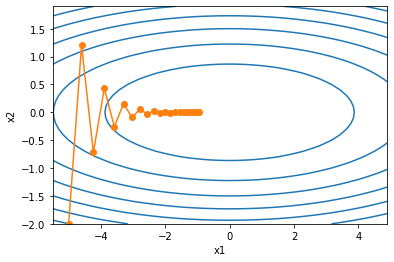

In [14]:
eta = 0.4 # Learning rate

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

## Momentum

$$ v_t = \gamma v_{t-1} + \eta_t  g_t $$
$$ x_t = \gamma x_{t-1} - v_t $$

epoch 20, x1 -0.062843, x2 0.001202


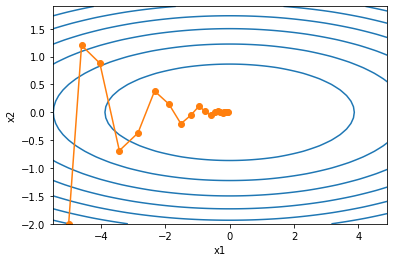

In [16]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 +eta * 0.2*x1
    v2 = gamma * v2 +eta * 4*x2
    return x1-v1, x2-v2, v1, v2

def f_2d(x1, x2):
    return 0.1*x1**2+2*x2**2

eta, gamma = 0.4, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

## AdaGrad

epoch 20, x1 -2.382563, x2 -0.158591


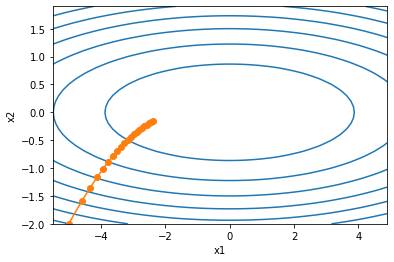

In [18]:
import math
def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4*x2, 1e-6
    s1 += g1**2
    s2 += g2**2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1*x1**2+2*x2**2

eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


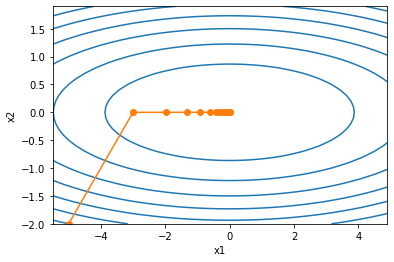

In [19]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

## RMSProp

epoch 20, x1 -0.010599, x2 0.000000


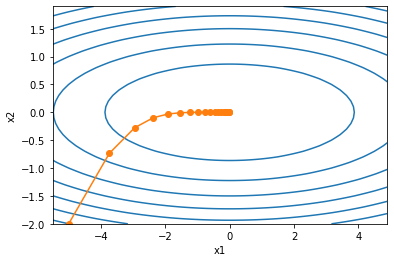

In [22]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4*x2, 1e-6
    s1 = gamma*s1 + (1-gamma)* g1**2
    s2 = gamma*s2 + (1-gamma)* g2**2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1*x1**2+2*x2**2

eta,gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))